<a href="https://colab.research.google.com/github/hussain0048/Projects/blob/master/Traffic_Sign_Classification_with_Keras_and_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction**

In the first part of this tutorial, we’ll discuss the concept of traffic sign classification and recognition, including the dataset we’ll be using to train our own custom traffic sign classifier.We’ll then implement TrafficSignNet, a Convolutional Neural Network which we’ll train on our dataset.

Given our trained model we’ll evaluate its accuracy on the test data and even learn how to make predictions on new input data as well.

#**What is traffic sign classification?**


Traffic sign classification is the process of automatically recognizing traffic signs along the road, including speed limit signs, yield signs, merge signs, etc. Being able to automatically recognize traffic signs enables us to build “smarter cars”.

Self-driving cars need traffic sign recognition in order to properly parse and understand the roadway. Similarly, “driver alert” systems inside cars need to understand the roadway around them to help aid and protect drivers.

Traffic sign recognition is just one of the problems that computer vision and deep learning can solve.

#  **Traffic sign dataset**

The dataset we’ll be using to train our own custom traffic sign classifier is the German Traffic Sign Recognition Benchmark (GTSRB).



The GTSRB dataset consists of 43 traffic sign classes and nearly 50,000 images.

In the real-world, traffic sign recognition is a two-stage process:

Localization: Detect and localize where in an input image/frame a traffic sign is.
Recognition: Take the localized ROI and actually recognize and classify the traffic sign.
Deep learning object detectors can perform localization and recognition in a single forward-pass of the network — if you’re interested in learning more about object detection and traffic sign localization using Faster R-CNNs, Single Shot Detectors (SSDs), and RetinaNet, be sure to refer to my book, Deep Learning for Computer Vision with Python, where I cover the topic in detail.

# **Challenges with the GTSRB dataset**

There are a number of challenges in the GTSRB dataset, the first being that images are low resolution, and worse, have poor contrast (as seen in Figure 2 above). These images are pixelated, and in some cases, it’s extremely challenging, if not impossible, for the human eye and brain to recognize the sign.

The second challenge with the dataset is handling class skew:

The top class (Speed limit 50km/h) has over 2,000 examples while the least represented class (Speed limit 20km/h) has under 200 examples — that’s an order of magnitude difference!

In order to successfully train an accurate traffic sign classifier we’ll need to devise an experiment that can:

Preprocess our input images to improve contrast.
Account for class label skew.

# **Configuring your development environment**


For this article, you’ll need to have the following packages installed:

1. OpenCV
2. NumPy
3. scikit-learn
4. scikit-image
5. imutils
6. matplotlib
7. TensorFlow 2.0 (CPU or GPU)

Luckily each of these is easily installed with pip, a Python package manager.

Let’s install the packages now, ideally into a virtual environment as shown (you’ll need to create the environment):

In [ ]:

!pip install opencv-contrib-python
!pip install numpy
!pip install scikit-learn
!pip install scikit-image
!pip install imutils
!pip install matplotlib
!pip install tensorflow==2.0.0 # or tensorflow-gpu

# **Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import pandas as pd



tEST


In [5]:
 import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D # Import directly from tensorflow.keras.layers
import random
import pickle
import pandas as pd
import cv2

In [6]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint


In [7]:
np.random.seed(0)


# **Load and Preprocess the Dataset**

Builten Dataset

In [ ]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the image data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


Manual dataset

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Github dataset



In [1]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 117.80 MiB | 10.33 MiB/s, done.
Updating files: 100% (4/4), done.


In [2]:
!ls german-traffic-signs


signnames.csv  test.p  train.p	valid.p


In [8]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)

In [9]:
print(type(train_data))
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

<class 'dict'>


In [10]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [11]:
assert(X_train.shape[0] == y_train.shape[0]), "The no of images is not equal to the no of labels"
assert(X_val.shape[0] == y_val.shape[0]), "The no of images is not equal to the no of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The no of images is not equal to the no of labels"
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3"
assert(X_val.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3"
assert(X_test.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3"

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Datasets (1)/Traffic Sign Classification/signnames.csv')

num_of_samples=[]

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
  for j, row in data.iterrows():
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j) + " - " + row["SignName"])
      num_of_samples.append(len(x_selected))


#**Data Exploration**

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


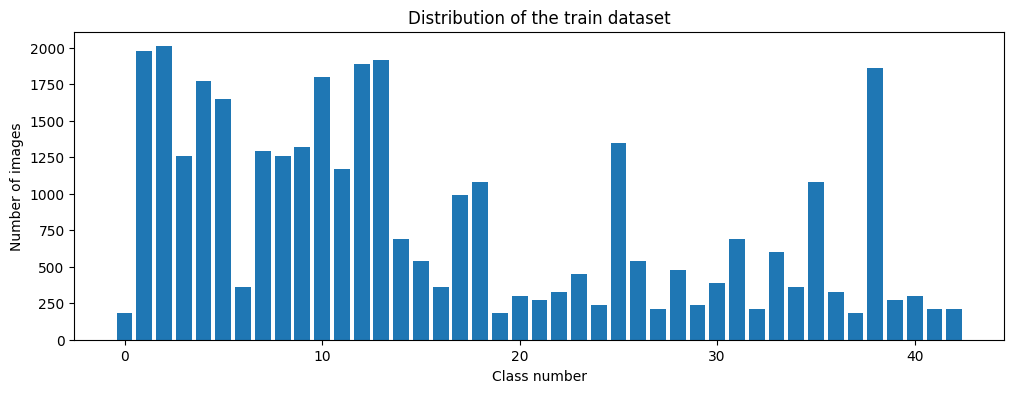

In [16]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
36


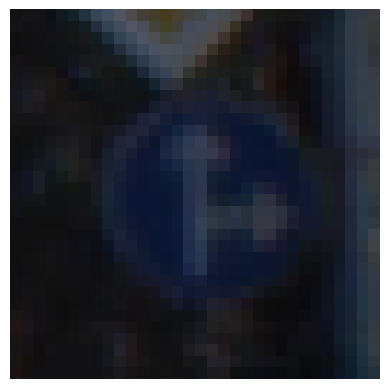

In [17]:

plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


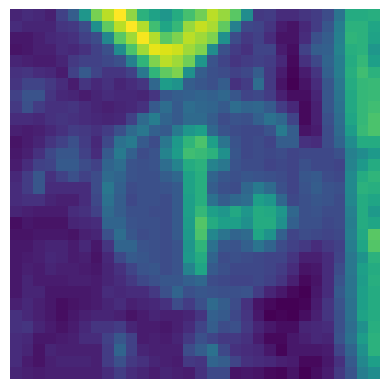

In [19]:
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)

(32, 32)


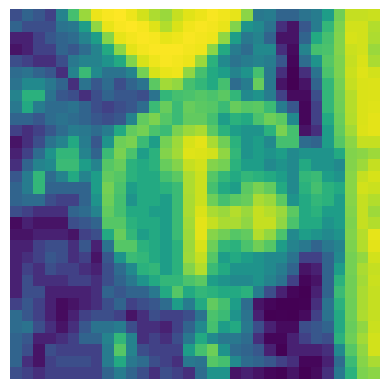

In [20]:
def equalize(img):
  img = cv2.equalizeHist(img)
  return img

img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)


#**Data Preprocessing**

In [21]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

In [22]:
X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

(34799, 32, 32)


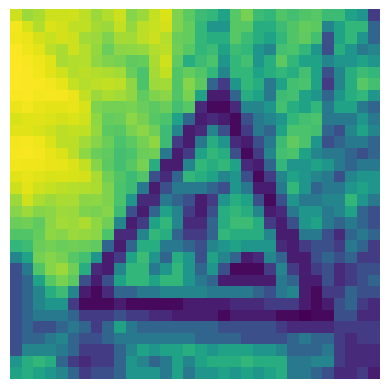

In [23]:

plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis("off")
print(X_train.shape)

In [24]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [27]:
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)
datagen.fit(X_train)

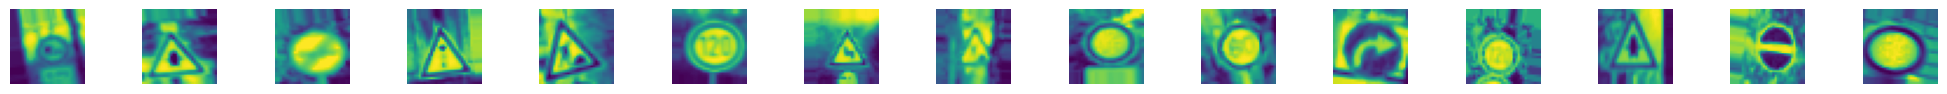

In [28]:
batches = datagen.flow(X_train, y_train, batch_size=20)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize = (20, 5))
fig.tight_layout()

for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32, 32))
  axs[i].axis('off')

In [29]:
print(X_batch.shape)


(20, 32, 32, 1)


In [30]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [31]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

#**Build the CNN Model**

In [32]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening Layer
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test

In [34]:
def leNet_model():
  model = Sequential()
  model.add(Conv2D(60,(5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(60,(5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(Dropout(0.5))


  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43, activation='softmax'))
  #Compile model
  model.compile(Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model


model = leNet_model()
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 60)          │           1,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 60)          │          90,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 60)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 10, 10, 30)          │          16,230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 30)            │           8,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 30)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │         240,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 43)                  │          21,543 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 378,023 (1.44 MB)

 Trainable params: 378,023 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

None


# **Train the CNN Model**

In [33]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/20


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 32, 32, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 32, 32, 1), dtype=float32)
  • training=True
  • mask=None

test

In [35]:
 history = model.fit(datagen.flow(X_train, y_train, batch_size=100), epochs=20, validation_data=(X_val, y_val), shuffle=1)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


348/348 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.2291 - loss: 2.8498 - val_accuracy: 0.8655 - val_loss: 0.4734
Epoch 2/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.7398 - loss: 0.8535 - val_accuracy: 0.9440 - val_loss: 0.1789
Epoch 3/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.8492 - loss: 0.4862 - val_accuracy: 0.9537 - val_loss: 0.1456
Epoch 4/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.8966 - loss: 0.3394 - val_accuracy: 0.9698 - val_loss: 0.1016
Epoch 5/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9183 - loss: 0.2579 - val_accuracy: 0.9839 - val_loss: 0.0611
Epoch 6/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.9345 - loss: 0.2090 - val_accuracy: 0.9769 - val_loss: 0.0742
Epoch 7/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 16s 47ms/step - accuracy: 0.9447 - loss: 0.1831 - val_accuracy: 0.9769 - val_loss: 0.0839
Epoch 8/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 0.9479 - loss: 0.1684 - val_accurac

# **Evaluate the Model**

In [36]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Accuracy: {test_accuracy:.4f}')


395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9721 - loss: 0.1151
Test Accuracy: 0.9732


# **Plot Training History**

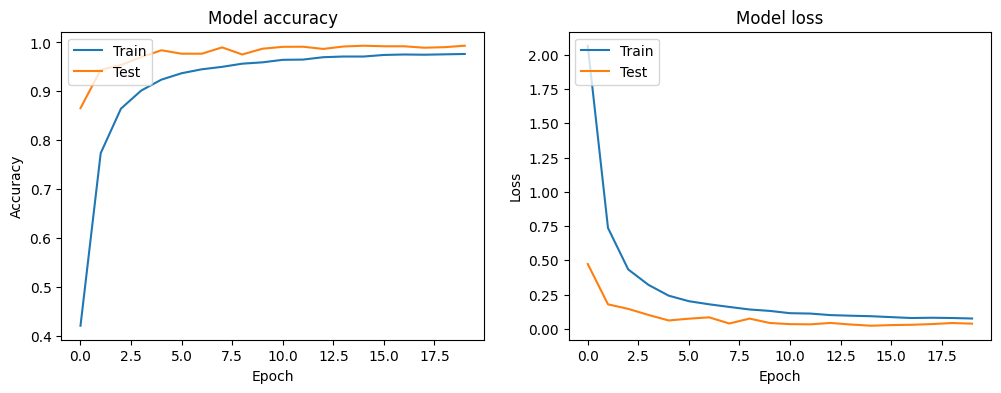

In [37]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


# **Make Predictions**

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


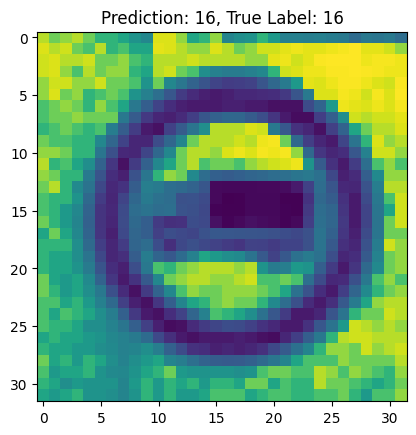

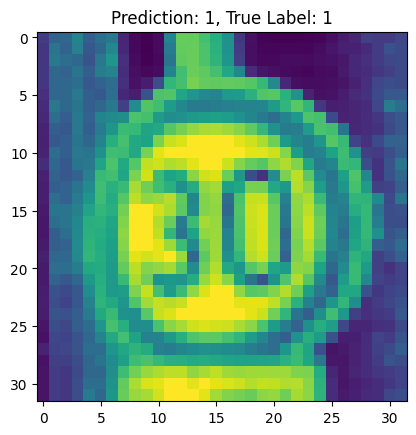

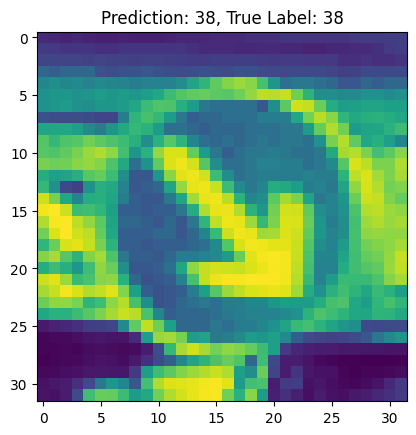

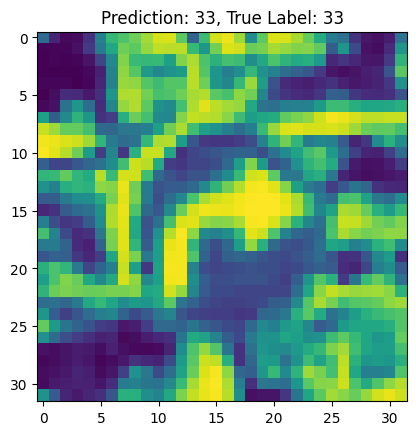

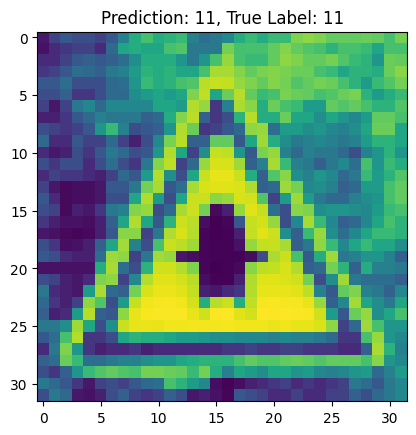

In [38]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Display some predictions with their corresponding true labels
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f'Prediction: {np.argmax(predictions[i])}, True Label: {np.argmax(y_test[i])}')
    plt.show()


# **Save the Model**

In [39]:
# Save the trained model
model.save('traffic_sign_classifier.h5')


#**References**

[1-Traffic Sign Classification with Keras and Deep Learning](https://pyimagesearch.com/2019/11/04/traffic-sign-classification-with-keras-and-deep-learning/)

2-[2-Traffic Sign Classification with Convolutional Neural Networks](https://github.com/PavankumarUppar/Traffic-Sign-Classification-with-CNN)